In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv
import time
import sys
from IPython.display import display, Markdown, Latex
import pandas as pd
import sympy as sp
#from latex2sympy2 import latex2sympy, latex2latex 
from sympy import simplify, cos, sin, expand, Eq
from sympy import Mul, symbols
from sympy import symbols, lambdify
from sympy.parsing.latex import parse_latex
from math import pi

In [9]:
evalsum_df = pd.read_csv('results/test_accuracy_summary.csv')
evalsum_df

,problem_type,problem_num,gpt4turbo_0shot,gpt4turbo_1shot,gpt4turbo_5shot,gpt3.5turbo_0shot,gpt3.5turbo_1shot,gpt3.5turbo_5shot,llama3_0shot,llama3_5shot,codellama_0shot,codellama_5shot
0,overall,437,13.40,37.6,46.3,4.54,14.80,25.6,3.98,21.1,3.13,10.30
1,nondimensionalization,200,6.04,36.5,48.6,5.05,6.11,24.3,0.50,17.9,0.00,8.41
2,root_finding,63,32.10,50.4,58.1,17.20,28.90,29.3,11.30,17.5,8.00,13.10
3,ode,54,15.70,20.3,34.7,7.41,22.60,32.1,11.60,21.9,14.10,15.30
4,integral,120,14.90,40.5,41.4,3.33,18.20,23.1,2.52,28.1,0.50,9.57


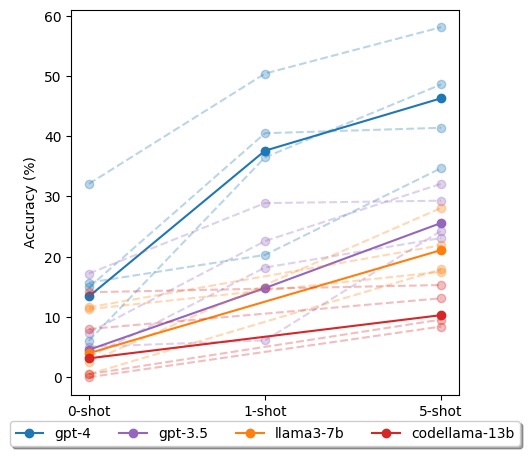

In [10]:
# by model
fig, ax  = plt.subplots(figsize=(5,5))
ax.plot(np.arange(3),evalsum_df.iloc[0,2:5],color = 'tab:blue',marker='o',label ='gpt-4')
for i in range(1,5):
    ax.plot(np.arange(3),evalsum_df.iloc[i,2:5],'--',color = 'tab:blue',marker='o',alpha=0.3)
ax.plot(np.arange(3),evalsum_df.iloc[0,5:8],color = 'tab:purple',marker='o',label ='gpt-3.5')
for i in range(1,5):
    ax.plot(np.arange(3),evalsum_df.iloc[i,5:8],'--',color = 'tab:purple',marker='o',alpha=0.3)
ax.plot([0,2],evalsum_df.iloc[0,8:10],color = 'tab:orange',marker='o',label ='llama3-7b')
for i in range(1,5):
    ax.plot([0,2],evalsum_df.iloc[i,8:10],'--',color = 'tab:orange',marker='o',alpha=0.3)
ax.plot([0,2],evalsum_df.iloc[0,10:12],color = 'tab:red',marker='o',label ='codellama-13b')
for i in range(1,5):
    ax.plot([0,2],evalsum_df.iloc[i,10:12],'--',color = 'tab:red',marker='o',alpha=0.3)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['0-shot','1-shot','5-shot'])
ax.set_ylabel('Accuracy (%)')
#ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

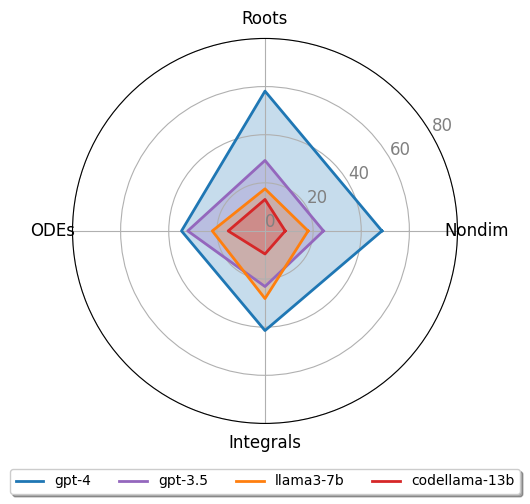

In [22]:

# Data
categories = ['Nondim','Roots','ODEs','Integrals']
num_vars = len(categories)

# Data values for each model
values = [
    list(evalsum_df.iloc[1:5,4]),  # GPT-4
    list(evalsum_df.iloc[1:5,7]),  # Model 2
    list(evalsum_df.iloc[1:5,9]),   # Model 3
    list(evalsum_df.iloc[1:5,11])  # Model 4
]

# Repeat the first value to close the circular graph
values = [v + [v[0]] for v in values]

# Compute angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='black', size=12)


# Draw ylabels
ax.set_rlabel_position(30)
plt.yticks([0, 20, 40,60,80], ['0','20','40','60','80'], color="grey", size=12)
plt.ylim(0, 80)

# Plot data
colors = ['tab:blue', 'tab:purple', 'tab:orange', 'tab:red']
names = ['gpt-4', 'gpt-3.5', 'llama3-7b', 'codellama-13b']
for i in range(len(values)):
    ax.plot(angles, values[i], linewidth=2, linestyle='solid', color=colors[i],label=names[i])
    ax.fill(angles, values[i], color=colors[i], alpha=0.25)

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.show()
